In [121]:
import numpy as np
import matplotlib.pyplot as plt
from net import ReservoirState, Reservoir, ReservoirNetwork

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [186]:
def pulses(N, pulse_size, n=100):
    y = np.zeros(N)
    for i in range(N//n):
        y[i*n:i*n+n] = np.random.choice([1, 2, 0, -1, -2])
    return y

In [187]:
res = Reservoir(1000, N_in=1, N_out=1, sparsity=0.01, g=1.5)

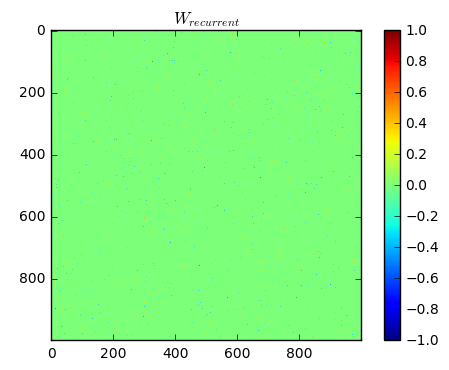

In [188]:
plt.imshow(res.W_recurrent.toarray())
plt.clim(-1, 1)
plt.colorbar()
plt.title(r"$W_{recurrent}$")
plt.show()

In [189]:
sys = ReservoirNetwork(res)

First lets drive it with no input (1000 timesteps)

In [190]:
null_input_result = sys.run(input_data=np.zeros((1, 3000)))

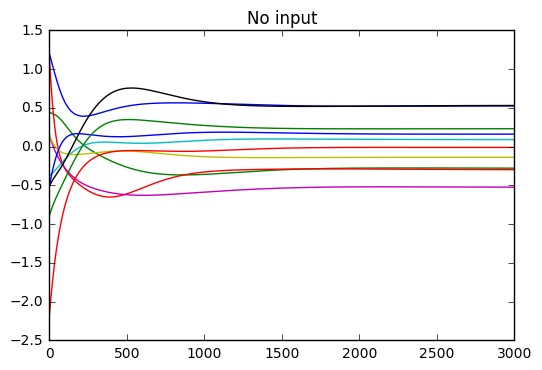

In [191]:
plt.plot(null_input_result["x"].T[:3000, :10])
plt.title("No input")
plt.show()

Next with a sine wave

In [192]:
t = np.linspace(0, 100, 10000)
sin = np.sin(2 * np.pi * 3.0 * t)
sinehi_input_result = sys.run(input_data=sin[None, :])

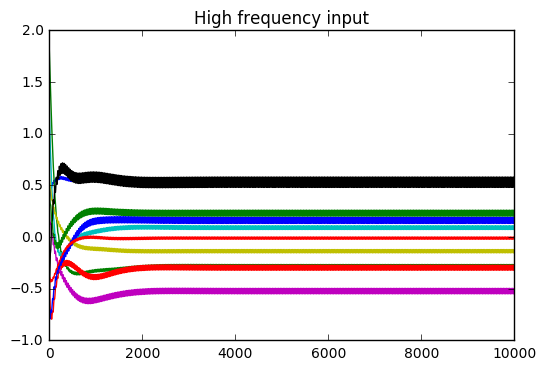

In [193]:
plt.plot(sinehi_input_result["x"].T[:10000, :10])
plt.title("High frequency input")
plt.show()

In [194]:
t = np.linspace(0, 100, 10000)
sin = np.sin(2 * np.pi * 0.1 * t)
sinelo_input_result = sys.run(input_data=sin[None, :])

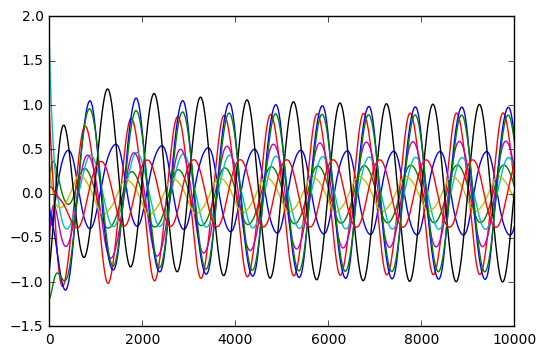

In [195]:
plt.plot(sinelo_input_result["x"].T[:10000, :10])
plt.show()

In [196]:
t = np.linspace(0, 100, 10000)
sin = np.sin(2 * np.pi * 0.01 * t)
sineverylo_input_result = sys.run(input_data=sin[None, :])

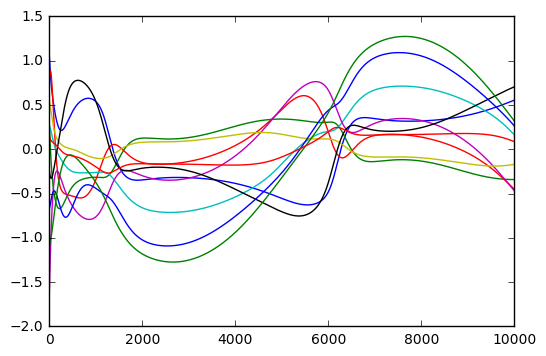

In [197]:
plt.plot(sineverylo_input_result["x"].T[:10000, :10])
plt.show()

Now with random pulses

In [198]:
t = np.linspace(0, 100, 10000)
p = pulses(10000, 1000, n=500)
pulses_500 = sys.run(p[None, :])

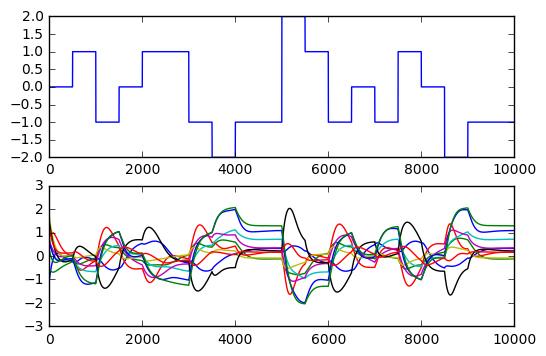

In [199]:
plt.subplot(2, 1, 1)
plt.plot(p)
plt.subplot(2, 1, 2)
plt.plot(pulses_500["x"].T[:10000, :10])

plt.show()

In [200]:
t = np.linspace(0, 100, 10000)
p = pulses(10000, 1000, n=100)
pulses_200 = sys.run(p[None, :])

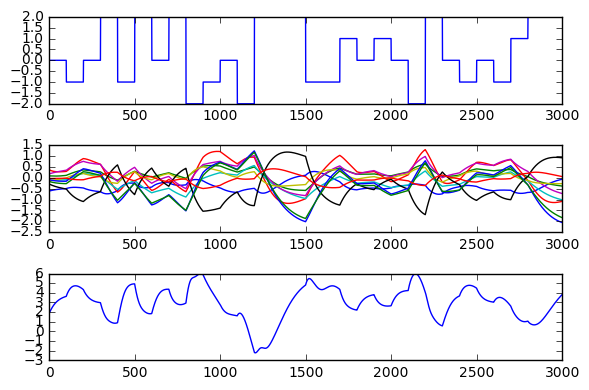

In [201]:
plt.subplot(3, 1, 1)
plt.plot(p[3000:6000])
plt.subplot(3, 1, 2)
plt.plot(pulses_200["x"].T[3000:6000, :10])
plt.subplot(3, 1, 3)
plt.plot(pulses_200["z"].T[3000:6000, :])
plt.tight_layout()
plt.show()

In [202]:
teaching_result = sys.teach(p[None, :], p[None, :])

In [203]:
pulses_taught = sys.run(p[None, :])

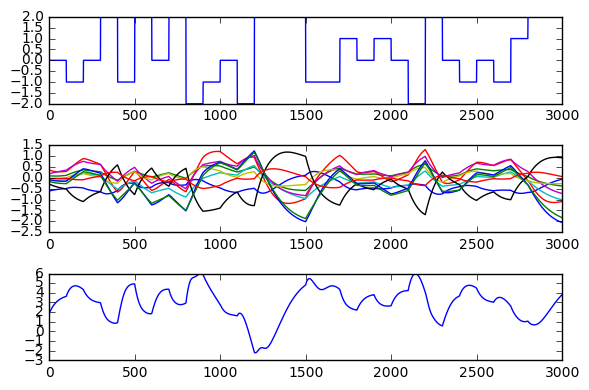

In [204]:
plt.subplot(3, 1, 1)
plt.plot(p[3000:6000])
plt.subplot(3, 1, 2)
plt.plot(pulses_taught["x"].T[3000:6000, :10])
plt.subplot(3, 1, 3)
plt.plot(pulses_taught["z"].T[3000:6000, :])
plt.tight_layout()
plt.show()